In [26]:
import hashlib
import json

import matplotlib.pyplot as plt
import numpy as np
import requests
from tqdm import tqdm

from collections import Counter
import os
from thefuzz import fuzz

In [2]:
with open("../templates/metadata_w_examples.json") as f:
    metadatas = json.load(f)
len(metadatas)

5113

In [47]:
directory = "../templates/template_examples"

print("Size:", len(metadatas))

temp_ids = set()
for metadata in metadatas:
    temp_ids.add(metadata["Template ID"])

print("Temps:", len(temp_ids))

examples = os.listdir(directory)
print("Examples:", len(examples))
orphans = []
for file in examples:
    temp_id = file.split("_")[1].split(".")[0]
    if temp_id not in temp_ids:
        orphans.append(temp_id)
        # os.remove(f"{directory}/{file}")

print("Orphan:", len(orphans))
print(len(Counter(orphans)), Counter(orphans))

Size: 5113
Temps: 5113
Examples: 15255
Orphan: 0
0 Counter()


In [48]:
exp_cnts = []
for metadata in metadatas:
    exp_cnts.append(len(metadata["examples"]))

In [58]:
Counter(exp_cnts)

Counter({0: 2175,
         1: 915,
         2: 457,
         14: 298,
         3: 266,
         4: 202,
         6: 123,
         5: 123,
         13: 112,
         7: 92,
         8: 75,
         10: 55,
         12: 47,
         9: 47,
         11: 40,
         15: 15,
         28: 10,
         18: 8,
         16: 7,
         17: 7,
         21: 5,
         20: 5,
         19: 5,
         24: 4,
         27: 4,
         26: 3,
         29: 3,
         22: 2,
         32: 2,
         30: 2,
         23: 1,
         34: 1,
         25: 1,
         35: 1})

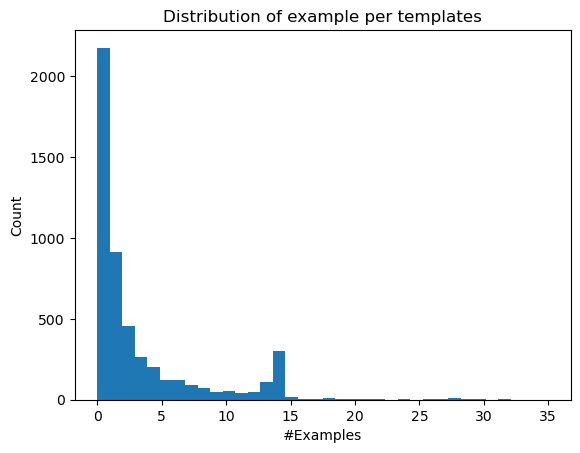

In [60]:
plt.hist(exp_cnts, bins=36)
plt.xlabel("#Examples")
plt.ylabel("Count")
plt.title("Distribution of example per templates")
plt.savefig("Distribution of examples.png")